In [4]:
import pandas as pd
import numpy as np

In [8]:
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%pylab inline
#plt.show()

Populating the interactive namespace from numpy and matplotlib


In [9]:
house_price = pd.read_csv("C:\Users\hp\Desktop\Data Science\ML\Linear Regression\Linear regression class files\Case Study - Housing Example\House_Prices.csv")

In [10]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [11]:
house_price.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [12]:
import pandas_profiling

C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\hp

In [236]:
pandas_profiling.ProfileReport(house_price)

Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,8.1 KiB
Average record size in memory,64.0 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [16]:
#Different Numerical and Categorical Values
num_variables=[key for key in dict(house_price.dtypes) if dict(house_price.dtypes)[key]in ['float64', 'int64', 'float32', 'int32']]
cat_variables=[key for key in dict(house_price.dtypes) if dict(house_price.dtypes)[key]in ['object']] 


In [18]:
house_price_cat

,Neighborhood,Brick
0,East,No
1,East,No
2,East,No
3,East,No
4,East,No
5,North,No
6,West,Yes
7,West,No
8,East,No
9,East,No


In [17]:
house_price_num=house_price[num_variables]
house_price_cat=house_price[cat_variables]

In [20]:
pandas_profiling.ProfileReport(house_price)

Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,8.1 KiB
Average record size in memory,64.0 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


ZeroDivisionError: float division by zero

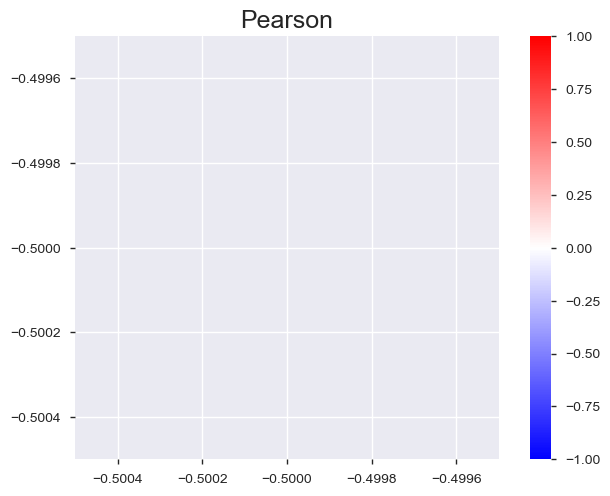

In [19]:
pandas_profiling.ProfileReport(house_price_cat)
                              

In [241]:
# outlier Treatment

def outlier_treatment(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    return x
    
house_price_num=house_price_num.apply(lambda x : outlier_treatment(x))    

In [242]:
# missing Value Treatment

def missing_values(x):
    x=x.fillna(x.mean())
    return x

house_price_num=house_price_num.apply(lambda x : missing_values(x))

In [243]:
house_price_num.describe()

,Bathrooms,Price,Bedrooms,Offers,Home,SqFt
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.437500,130388.218750,3.019219,2.570312,64.500000,2000.804688
std,0.498028,26280.461229,0.715071,1.047559,37.053408,207.625863
min,2.000000,81570.000000,2.000000,1.000000,2.270000,1530.800000
25%,2.000000,111325.000000,3.000000,2.000000,32.750000,1880.000000
50%,2.000000,125950.000000,3.000000,3.000000,64.500000,2000.000000
75%,3.000000,148250.000000,3.000000,3.000000,96.250000,2140.000000
max,3.000000,196476.000000,4.730000,5.000000,126.730000,2505.700000


In [244]:
# create dummies
def create_dummies(x):
    col_dummies= pd.get_dummies(x, prefix='any')
    #col_dummies.drop(col_dummies[0], inplace=True)
    return col_dummies



house_price_cat=house_price_cat.apply(lambda x : create_dummies(x))


ValueError: If using all scalar values, you must pass an index

In [245]:
# create dummies
def create_dummies(df, col):
    col_dummies= pd.get_dummies(df[col], prefix=col)
    col_dummies.drop(col_dummies.columns[0], inplace=True,axis=1)
    df=pd.concat([df, col_dummies], axis=1)
    df.drop(col, inplace=True, axis=1)
    return df

for a in ['Neighborhood', 'Brick']:
    #house_price_cat[a]=house_price_cat[a].astype('category')
    house_price_cat= create_dummies(house_price_cat, a)



In [255]:

house_price_cat.head(2)
house_price_num.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 6 columns):
Bathrooms    128 non-null float64
Price        128 non-null float64
Bedrooms     128 non-null float64
Offers       128 non-null float64
Home         128 non-null float64
SqFt         128 non-null float64
dtypes: float64(6)
memory usage: 6.1 KB


In [257]:
# merage both categorical and Numerical variales

house_price_new=pd.concat([house_price_num, house_price_cat], axis=1)
house_price_new.shape
print house_price_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
Bathrooms             128 non-null float64
Price                 128 non-null float64
Bedrooms              128 non-null float64
Offers                128 non-null float64
Home                  128 non-null float64
SqFt                  128 non-null float64
Neighborhood_North    128 non-null uint8
Neighborhood_West     128 non-null uint8
Brick_Yes             128 non-null uint8
dtypes: float64(6), uint8(3)
memory usage: 6.4 KB
None


In [258]:
pandas_profiling.ProfileReport(house_price_new)

Number of variables,9
Number of observations,128
Total Missing (%),0.0%
Total size in memory,6.4 KiB
Average record size in memory,51.0 B
Numeric,5
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [249]:
# 3rd property of linear regression
# correlation using - correlation matix

house_price_new.corr()


,Bathrooms,Price,Bedrooms,Offers,Home,SqFt,Neighborhood_North,Neighborhood_West,Brick_Yes
Bathrooms,1.000000,0.501744,0.384359,0.182055,0.109003,0.520577,-0.273551,0.271585,0.155127
Price,0.501744,1.000000,0.523483,-0.314728,0.100964,0.549070,-0.551407,0.719472,0.452717
Bedrooms,0.384359,0.523483,1.000000,0.119065,-0.071751,0.481769,-0.365929,0.476137,0.038610
Offers,0.182055,-0.314728,0.119065,1.000000,-0.051830,0.338639,0.329560,-0.329272,-0.142766
Home,0.109003,0.100964,-0.071751,-0.051830,1.000000,0.174942,0.049349,0.026779,0.037418
SqFt,0.520577,0.549070,0.481769,0.338639,0.174942,1.000000,-0.286627,0.247038,0.088258
Neighborhood_North,-0.273551,-0.551407,-0.365929,0.329560,0.049349,-0.286627,1.000000,-0.479098,-0.260554
Neighborhood_West,0.271585,0.719472,0.476137,-0.329272,0.026779,0.247038,-0.479098,1.000000,0.115793
Brick_Yes,0.155127,0.452717,0.038610,-0.142766,0.037418,0.088258,-0.260554,0.115793,1.000000


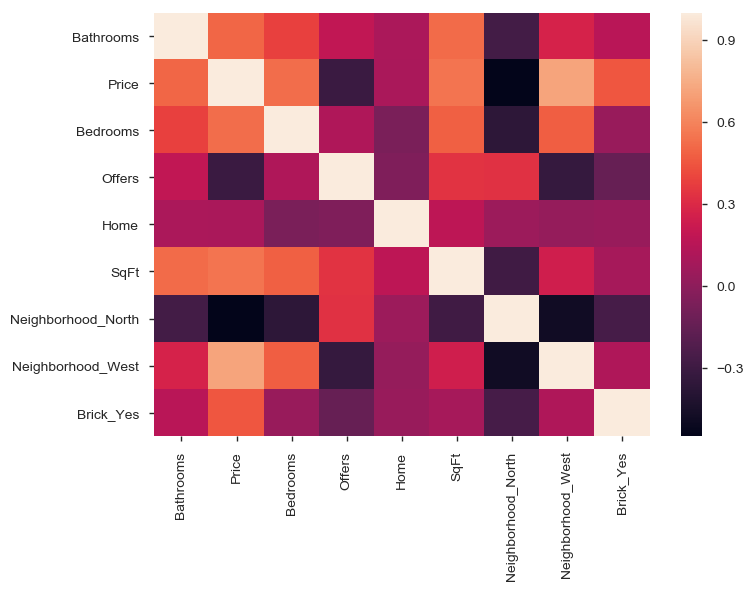

In [250]:
# correlation using - heatmap

sns.heatmap(house_price_new.corr())

In [251]:
# correlation using - VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


y, X = dmatrices('Price~Bathrooms+Bedrooms+Offers+Home+SqFt+Neighborhood_North+Neighborhood_West+Brick_Yes', house_price_new, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,121.3,Intercept
1,1.5,Bathrooms
2,1.7,Bedrooms
3,1.8,Offers
4,1.1,Home
5,2.0,SqFt
6,1.7,Neighborhood_North
7,1.8,Neighborhood_West
8,1.1,Brick_Yes


In [252]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('Price~Bathrooms+Bedrooms+Offers+Home+SqFt+Neighborhood+Neighborhood+Brick', house_price, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,116.9,Intercept
1,1.7,Neighborhood[T.North]
2,1.7,Neighborhood[T.West]
3,1.1,Brick[T.Yes]
4,1.5,Bathrooms
5,1.7,Bedrooms
6,1.8,Offers
7,1.1,Home
8,2.0,SqFt


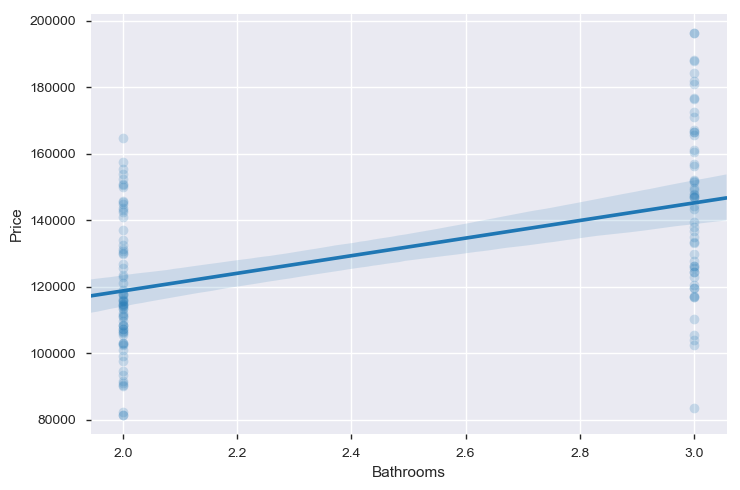

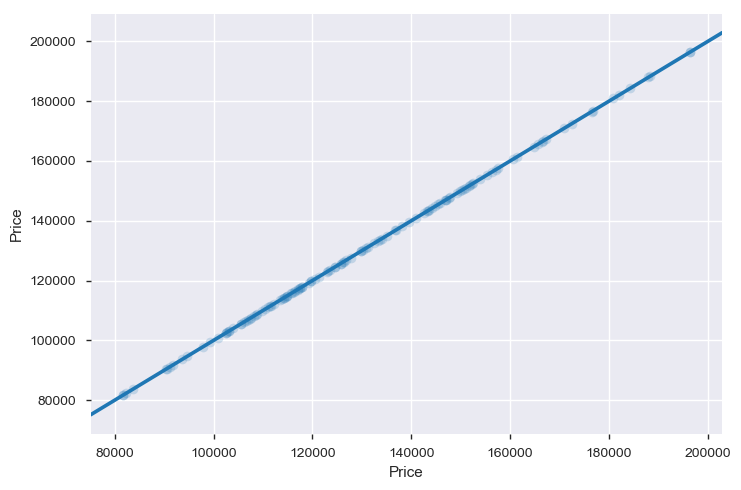

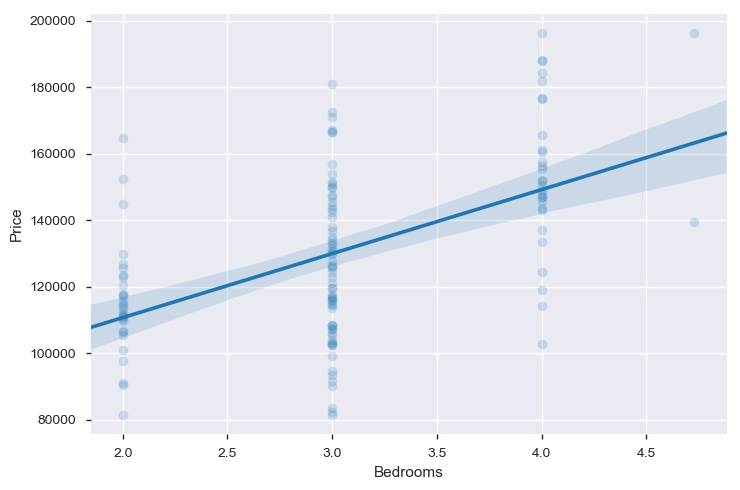

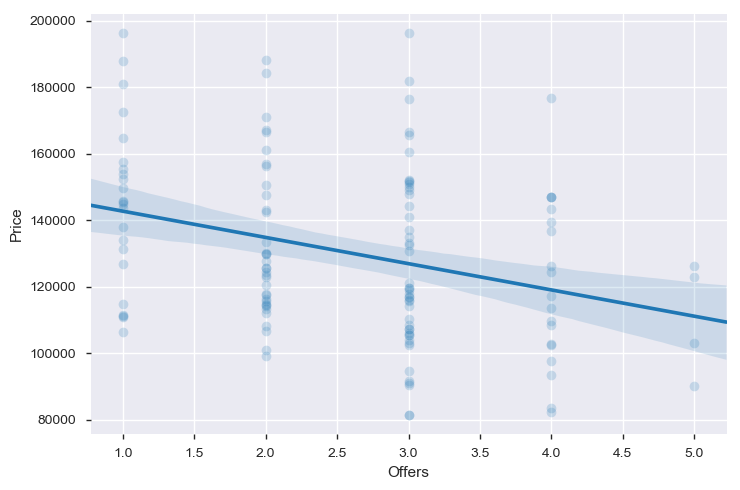

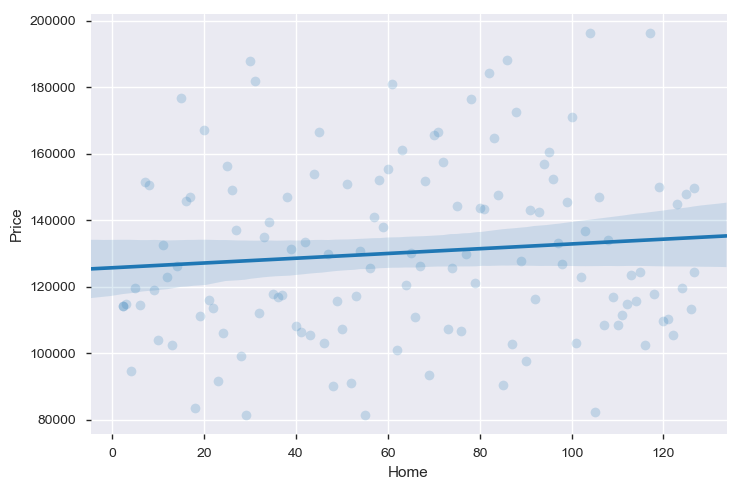

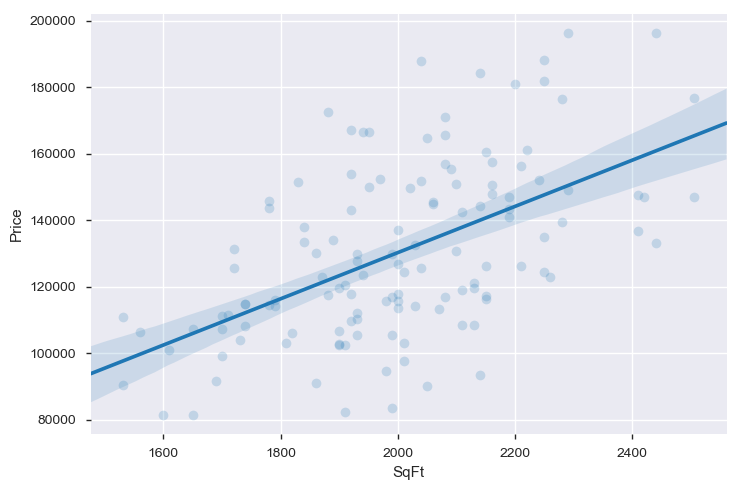

In [253]:
# check the 1st property of linear regression
# pandas scatter plot

def plot_graph(X):
    #house_price_new.plot(kind='scatter', x=X, y='Price', alpha=0.2)
    sns.lmplot(x=X, y='Price', data=house_price_new,aspect=1.5, scatter_kws={'alpha':0.2})

    
for col in num_variables:  
        plot_graph(col)



C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


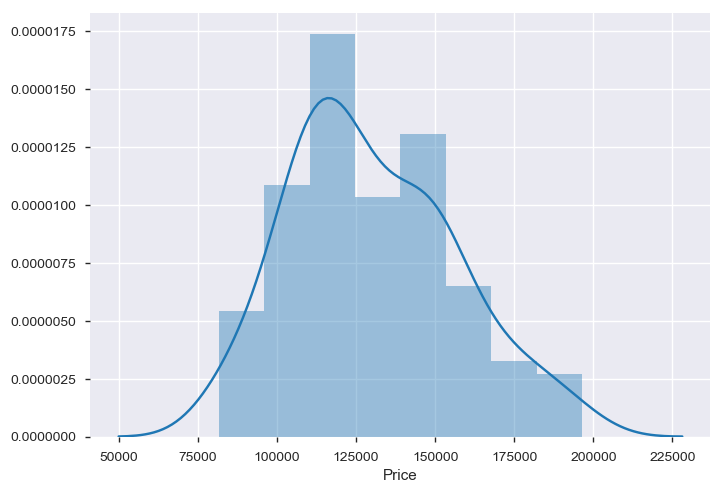

In [259]:
# check normal distribution of Price

sns.distplot(house_price_new.Price)

In [260]:
#split the data
features=house_price_new.columns.difference(["Price"])


In [261]:
train_x, test_x, train_y, test_y = train_test_split(house_price_new[features], house_price_new['Price'], test_size=0.3, random_state = 123)
print len(train_x)
print len(test_x)

89
39


In [262]:
# create a model using sklearn
linearmodel=LinearRegression()

In [263]:
linearmodel.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [264]:
Predict_y=linearmodel.predict(test_x)
train_Predict_y=linearmodel.predict(train_x)

In [265]:
rmse = np.sqrt( metrics.mean_squared_error( test_y, Predict_y ) )
print rmse

10184.098345314625


In [266]:
rmse = np.sqrt( metrics.mean_squared_error( train_y, train_Predict_y ) )
print rmse

9188.372845494168


In [267]:
# create the model using OLS 
import statsmodels.formula.api as sfm
lm=sfm.ols('Price~Bathrooms+Bedrooms+Offers+Home+SqFt+Neighborhood_North+Neighborhood_West+Brick_Yes', house_price_new).fit()

In [268]:
Predict_y_1=linearmodel.predict(test_x)
train_Predict_y_1=linearmodel.predict(train_x)

In [269]:
rmse_1 = np.sqrt( metrics.mean_squared_error( test_y, Predict_y ) )
print rmse_1
rmse_2 = np.sqrt( metrics.mean_squared_error( train_y, train_Predict_y ) )
print rmse_2

10184.098345314625
9188.372845494168


In [270]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     101.3
Date:                Fri, 30 Nov 2018   Prob (F-statistic):           2.00e-49
Time:                        16:59:16   Log-Likelihood:                -1352.2
No. Observations:                 128   AIC:                             2722.
Df Residuals:                     119   BIC:                             2748.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1835.8591   9457.610      0.194      0.846   -1.69e+04    2.06e+04
Bathrooms           8565.0840   2112.195      4.055      0.000    4382.728    1.27e+04
Bedrooms            4265.7935   1590.558      2.682      0.008    1116.329    7415.258
Offers             -8508.5155   1096.478     -7.760      0.000   -1.07e+04   -6337.379
Home                 -15.3092     24.567     -0.623      0.534     -63.954      33.335
SqFt                  52.3988      5.820      9.003      0.000      40.875      63.923
Neighborhood_North  1703.4513   2353.017      0.724      0.471   -2955.758    6362.661
Neighborhood_West   2.199e+04   2472.689      8.892      0.000    1.71e+04    2.69e+04
Brick_Yes           1.685e+04   1918.440      8.782      0.000     1.3e+04    2.06e+04
==============================================================================
Omnibus:                        2.929   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.442
Skew:                           0.233   Prob(JB):                        0.295
Kurtosis:                       3.490   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


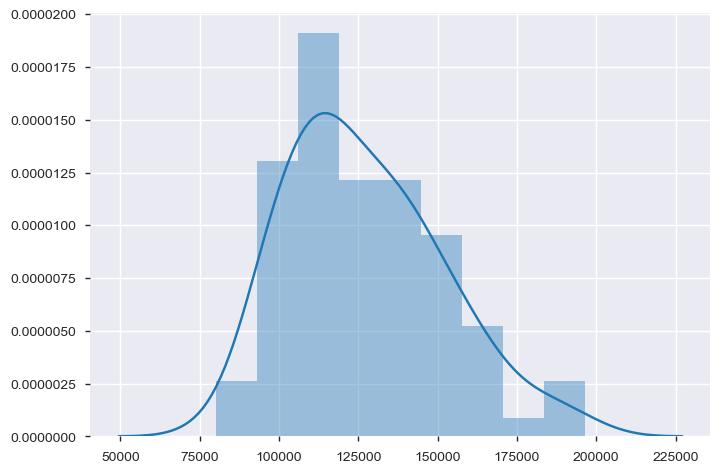

In [271]:
#distribution of predicted Y 
sns.distplot(train_Predict_y_1)

In [272]:
residual= train_y-train_Predict_y_1
residual

79      3637.156853
104   -12455.660142
60     12358.033748
21      8960.460254
11     -2989.047180
45      3791.686317
107    -1193.140812
88      5122.694217
112    -2245.492125
91     -7783.482707
41    -11955.043229
44      1468.226341
51     -8550.679119
65     -3549.072206
121    -6031.746488
103     9832.902607
12      2394.339958
101     8059.963472
56      2726.864398
20     16904.450922
50     17680.351029
108   -16601.599876
100     8803.193794
37    -15194.042117
119    17279.773197
43     14591.011250
1      -3230.360294
54    -10385.635066
14      8934.811092
6       -996.776292
           ...     
2       1864.873931
67     27938.942003
55      9786.355225
49     -5551.792149
68    -17132.120867
80      5435.007798
127     1470.784641
36      8293.968289
78      3673.484428
120     1020.527738
25      8013.778428
115    -9488.780985
46      6293.927588
32    -16054.998985
73     -1795.475763
47     -8428.839910
113   -11442.512657
96     -7620.440297
97    -10819.822711


C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


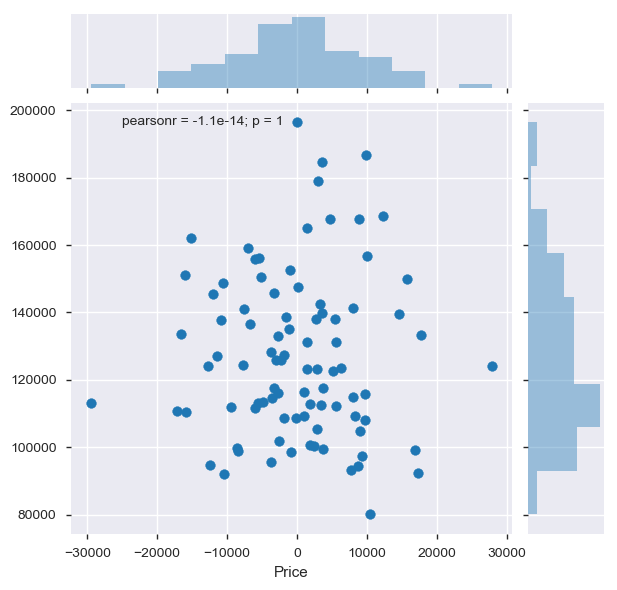

In [273]:
# check the 4th property of linear regression
sns.jointplot(residual,train_Predict_y_1)




C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


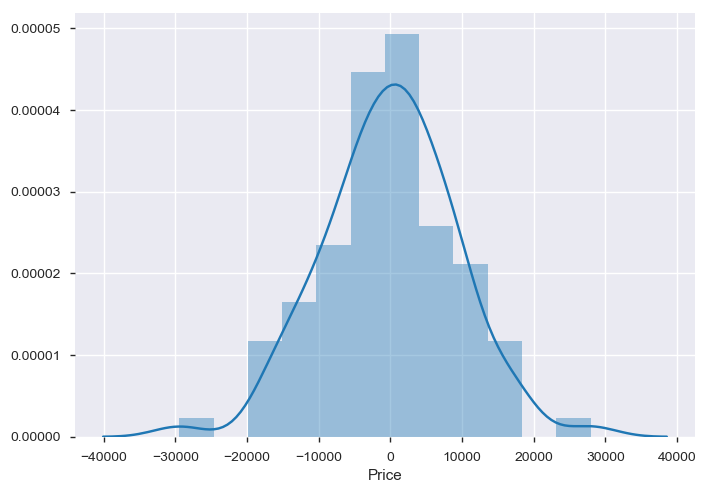

In [274]:
# to check the 2nd property of linear regression
# histogram

sns.distplot(residual)



((array([-2.4201093 , -2.07859531, -1.88053876, -1.7368434 , -1.62203926,
         -1.52533698, -1.44110438, -1.3660116 , -1.29791819, -1.23536263,
         -1.17730022, -1.12295684, -1.07174195, -1.0231941 , -0.97694535,
         -0.9326972 , -0.89020381, -0.84926009, -0.80969288, -0.7713545 ,
         -0.73411777, -0.69787225, -0.66252125, -0.62797954, -0.59417141,
         -0.56102925, -0.52849225, -0.49650544, -0.46501882, -0.43398669,
         -0.40336704, -0.37312105, -0.34321266, -0.31360823, -0.28427618,
         -0.25518675, -0.22631171, -0.19762418, -0.1690984 , -0.14070959,
         -0.11243375, -0.08424754, -0.05612811, -0.02805301,  0.        ,
          0.02805301,  0.05612811,  0.08424754,  0.11243375,  0.14070959,
          0.1690984 ,  0.19762418,  0.22631171,  0.25518675,  0.28427618,
          0.31360823,  0.34321266,  0.37312105,  0.40336704,  0.43398669,
          0.46501882,  0.49650544,  0.52849225,  0.56102925,  0.59417141,
          0.62797954,  0.66252125,  0.

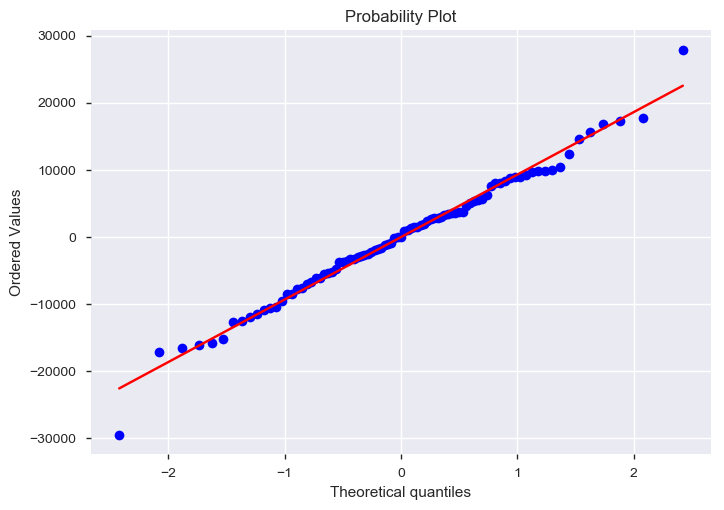

In [275]:
#Q-Q plot
from scipy import stats
import pylab

stats.probplot( residual, dist="norm", plot=pylab )





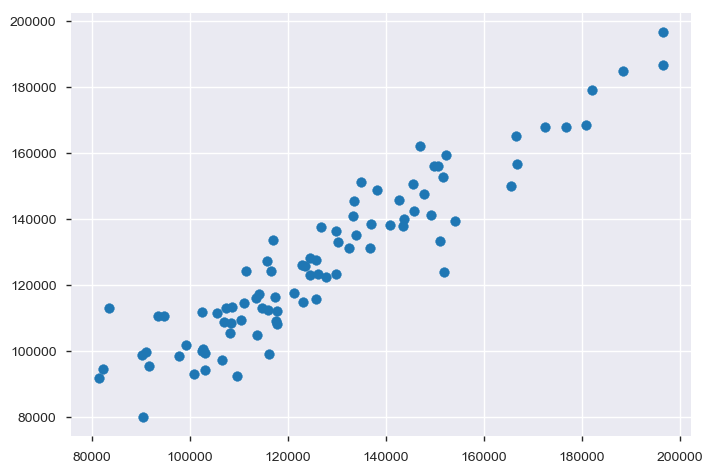

In [276]:
plt.scatter(train_y,train_Predict_y_1)